In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os

from JUSUFlike.Project.Codes.processing_results import *
from IPython.display import Image
import tvb_model_reference.src.nuu_tools_simulation_human as tools
from sklearn.cluster import KMeans

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"]})

fig_labels = ['$S$', '$b_e$ (pA)', '$E_{L,i}$ (mV)', '$E_{L,e}$ (mV)', '$T$ (ms)']
figures_folder = './figures/figures_report/new_connectome/'

### All the metrics obtained
In the following dictionary one can find the strings that identify all the metrics that have been obtained from the simulations. Some of them are quite clear in their name. Others are commented with the objective of giving a bit more insight about them.

In [2]:
dict_params = {'a': 0, 'b_e': 1, 'E_L_i': 2, 'E_L_e': 3, 'T': 4}

dict_metrics = {'mean_FR_e': 5, 'mean_FR_i': 23, 'std_FR_e': 6, 'std_FR_i': 24,
                # Mean of FC and PLI matrices for both FRs
                'mean_FC_e': 7, 'mean_FC_i': 25, 'mean_PLI_e': 8, 'mean_PLI_i': 26,
                # Mean duration of up and down states
                'mean_up_e': 9, 'mean_up_i': 27, 'mean_down_e': 10, 'mean_down_i': 28,
                # all time max and minimum FR over all the regions
                'max_FR_e': 11, 'max_FR_i': 29, 
                # Peaks of PSDs. We obtain the frequency (fmax) at which the peak appears and 
                # its amplitude/power (pmax)
                # The peak has been calculted with two methods: peak with highest amplitude (amp)
                # and peak with highest prominence (prom)
                'fmax_amp_e': 12, 'pmax_amp_e': 13, 'fmax_amp_i': 30, 'pmax_amp_i': 31, 
                'fmax_prom_e': 14, 'pmax_prom_e': 15, 'fmax_prom_i': 32, 'pmax_prom_i': 33, 
                # The PSD has also been fitted to a power law b/f^a. We have obtained the slope a and
                # the score of the fitting.
                'slope_PSD_e': 16, 'score_PSD_e': 17, 'slope_PSD_i': 34, 'score_PSD_i': 35, 
                # frequencies have been divided into 5 typical bands: 'delta': (0.5, 4)Hz, 
                # 'theta': (4, 8)Hz,  'alpha': (8, 12)Hz, 'beta': (12, 30) Hz, 'gamma': (30, 100) Hz
                # and the relative power in each band has been obtained by numerical integration
                'delta_rel_p_e': 18, 'theta_rel_p_e': 19, 'alpha_rel_p_e': 20, 'beta_rel_p_e': 21, 
                'gamma_rel_p_e': 22, 'delta_rel_p_i': 36,'theta_rel_p_i': 37, 'alpha_rel_p_i': 38,
                'beta_rel_p_i': 39, 'gamma_rel_p_i': 40,
                # Finally, scoring on how close the spontaneous dynamics are to the expected dynamics
                # of the DMN has been performed in two ways.
                # 1. zscore: take PCC as seed, obtain correlations with all other regions (zscores),
                # take: the 10 most correlated, count how many of the 10 regions belong to DMN
                # 2. frmean: obtain mean FR over time of each region, take the 10 with highest
                # mean FR, count how many of the 10 regions belong to DMN.
                'ratio_frmean_dmn_exc': 41, 'ratio_zscore_dmn_exc': 42, 'ratio_frmean_dmn_inh': 43,
                'ratio_zscore_dmn_inh': 44, 
                # To be finished, trying to count how many AI or UD nodes are in the 68 regions
                'ratio_AI_exc': 45,
                # Correlation between the FC matrix and the SC/weight matrix.
                'corr_FC_SC_e': 46, 'corr_FC_SC_i': 47,
                # Correlation between the FC matrix and the SC/weight matrix.
                'corr_FC_tract_e': 48, 'corr_FC_tract_i': 49, 
                # Coefficient of variation (std/mean)
                'coeff_var_e': 50, 'coeff_var_i':51,
                # standard deviation of the mean FR in time (so std of a 68 element vector)
                'std_of_means_e': 52, 'std_of_means_i': 53, 
                # Mean of std vector in time (so mean of 68 std element vector)
                'means_of_std_e':54, 'means_of_std_i': 55}

# 3D plots of the parameter space. Robustness of AI-UD transitions

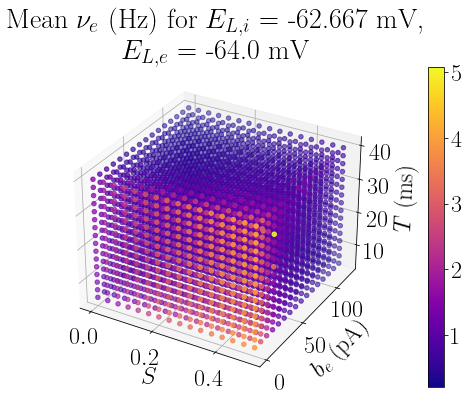

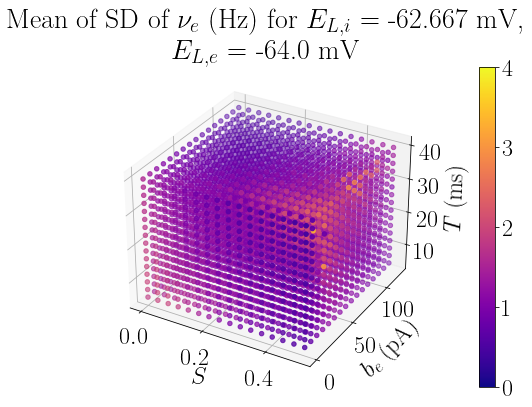

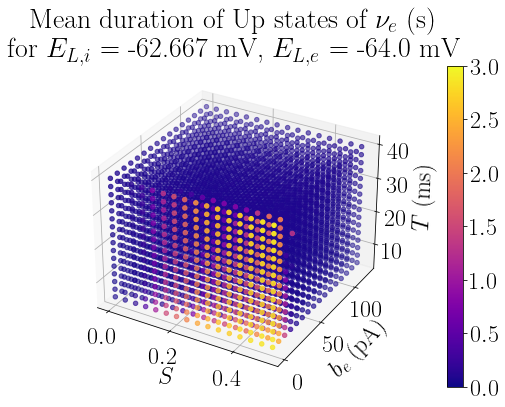

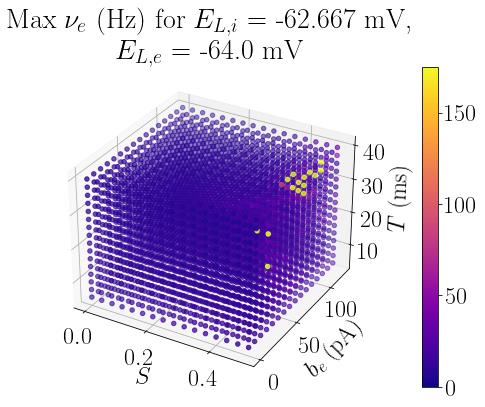

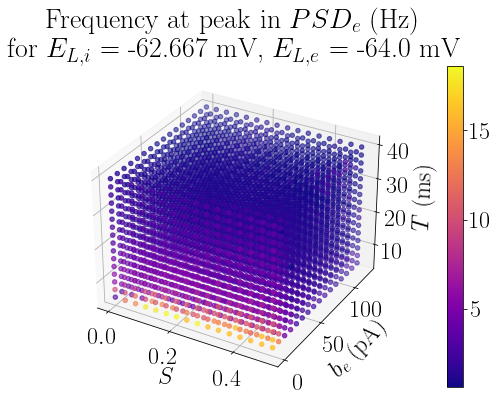

In [3]:
# Settings for here
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


batches_folder = './JUSUFlike/Project/FinalResultsNew/'

ELI = -63
ELE = -64
fig = plot_metric_3d('mean_FR_e', ('a', 'b_e', 'T'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(None, None))
fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_FR.pdf')
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_FR.png')
plt.show()
fig = plot_metric_3d('means_of_std_e', ('a', 'b_e', 'T'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(0, 4))
fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mstds_FR.pdf')
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mstds_FR.png')
plt.show()
fig = plot_metric_3d('mean_up_e', ('a', 'b_e', 'T'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(0, 3))
fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_up.pdf')
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_up.png')
plt.show()
#fig = plot_metric_3d_diagonalELs('beta_rel_p_e', ('E_L_e', 'b_e', 'a'), {'T': 20}, batches_folder, 
#                   steps=16, fig=None, ax=None, imshow_range=(None, None), diagonalELs=True)
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_down.eps')

fig = plot_metric_3d('max_FR_e', ('a', 'b_e', 'T'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(0, 175))
fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_max.pdf')
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_mean_up.png')
plt.show()

fig = plot_metric_3d('fmax_prom_e', ('a', 'b_e', 'T'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(None, None))
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_fmax.pdf')
#fig.savefig(figures_folder + f'/ELI{ELI}_ELE{ELE}_fmax.png')
plt.show()


#fig = plot_metric_3d_diagonalELs('max_FR_e', ('E_L_e', 'b_e', 'a'), {'T': 20}, batches_folder, 
#                   steps=16, fig=None, ax=None, imshow_range=(0, 175), diagonalELs=True)
#plt.show()
plt.close('all')
# Guardarlas en .eps y hacer una figura junta con photoshop

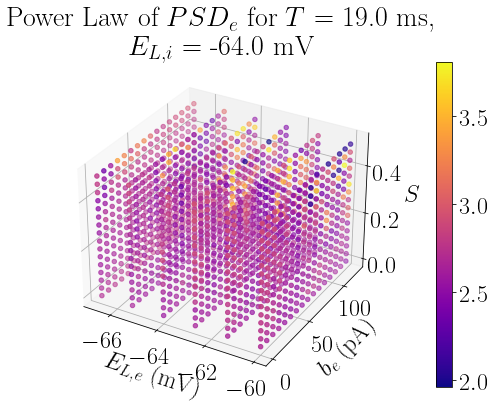

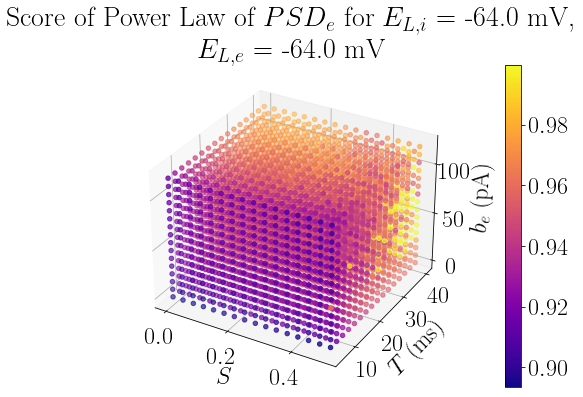

In [4]:
ELI = -64
fig = plot_metric_3d('slope_PSD_e', ('E_L_e', 'b_e', 'a'), {'T': 19, 'E_L_i': ELI}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(None, None))
plt.show()
fig = plot_metric_3d('score_PSD_e', ('a', 'T', 'b_e'), {'E_L_i': ELI, 'E_L_e': ELE}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(None, None))
plt.show()

# 3D plots of Parameter Space. $E_L$ diagonal

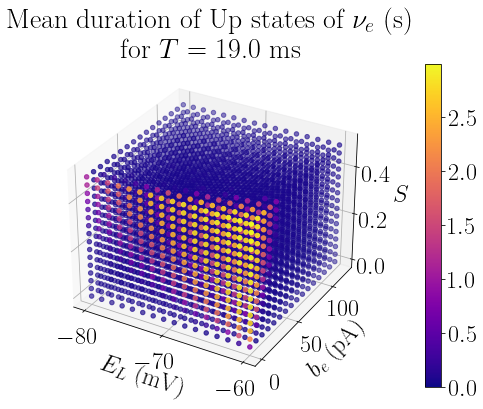

In [5]:
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

batches_folder = './JUSUFlike/Project/FinalResultsNew/'

fig = plot_metric_3d_diagonalELs('mean_up_e', ('E_L_e', 'b_e', 'a'), {'T': 20}, batches_folder, 
                   steps=16, fig=None, ax=None, imshow_range=(0, None), diagonalELs=True)
#fig.savefig(figures_folder + '/diagonal_UD_AI.pdf')
plt.show()
plt.close('all')

# 3D Movie

In [6]:
fixed_params = {'b_e':0}

# I have to think how to improve this movie function so that E_L_e can be swept
params_sweep_im = ('a', 'E_L_i', 'E_L_e')
param_sweep_time = 'T'

title_movie = 'pointsmaxJUSUF'
for key in fixed_params.keys():
    title_movie += '_' + key + str(fixed_params[key]) 
title_movie += 'frames' + param_sweep_time
print(title_movie)

movies_folder = '/home/master/Desktop/tests_hpc/figures/JUSUF/movie/'
batches_folder = './JUSUFlike/Project/FinalResults/'

steps = 16
metric = 'max_FR_e'
imshow_range = (0, 175)

make_movie_3d(metric, fixed_params, params_sweep_im, param_sweep_time, title_movie, movies_folder, 
                     batches_folder, steps, imshow_range=imshow_range, type_plot='points')

Image(filename=movies_folder + title_movie + '3d/' + title_movie + '.gif')

pointsmaxJUSUF_b_e0framesT


FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: '/home/master/Desktop/tests_hpc/figures/JUSUF/movie/pointsmaxJUSUF_b_e0framesT3d/'

### Look for sets of parameters that result in the maximum value of a certain metric
It might happen that we want to find the sets of parameters that result in obtaining the highest values of metrics. For instance, let's see which sets of parameters get us the higher number of DMN regions in the top 10 regions with highest mean FR. 

In [7]:
# 'ratio_frmean_dmn_exc': 41, 'ratio_zscore_dmn_exc': 42
max_value_metric, pars_where_max, idxes = params_of_max_metric("ratio_zscore_dmn_exc",
                                                        batches_folder, avoid_bp = True, steps=16, verbose=True)

Max ratio_zscore_dmn_exc = 0.7
Sets of values for maximum ratio_zscore_dmn_exc
a= 0.1, b_e= 32.0, E_L_i= -78.667, E_L_e= -69.333, T= 40.0, 


### Do all combinations of sweeps to check the parameter sweep went well

In [8]:
import itertools
execute = False
fixed_params = {'a': 0.3, 'E_L_e': -80, 'E_L_i': -80}
params_sweep = ('b_e', 'T')

parameters = ['a', 'b_e', 'E_L_i', 'E_L_e', 'T']

if execute:
    for params_sweep in itertools.combinations(parameters, 2):
        fixed_list = parameters.copy()
        for param in params_sweep:
            fixed_list.remove(param)
        fixed_params = {}
        for fixed in fixed_list:
            if fixed == 'a':
                fixed_params[fixed] = 0.5*np.random.rand()
            elif fixed == 'b_e':
                fixed_params[fixed] = 120 * np.random.rand()
            elif fixed == 'E_L_i':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'E_L_e':
                fixed_params[fixed] = -60 - 20 * np.random.rand()
            elif fixed == 'T':
                fixed_params[fixed] = 40*np.random.rand()
        print(params_sweep)
        print(fixed_params)
        steps = 6
        metrics = ['mean_FR_e', 'mean_FR_i', 'max_FR_e', 'mean_FC_e', 
                   'ratio_zscore_dmn_inh', 'ratio_frmean_dmn_exc']
        fig = plot_multiple_metrics(metrics, batches_folder, params_sweep, fixed_params, steps)
        plt.show()

## Count how many combinations of parameters result in the broken point

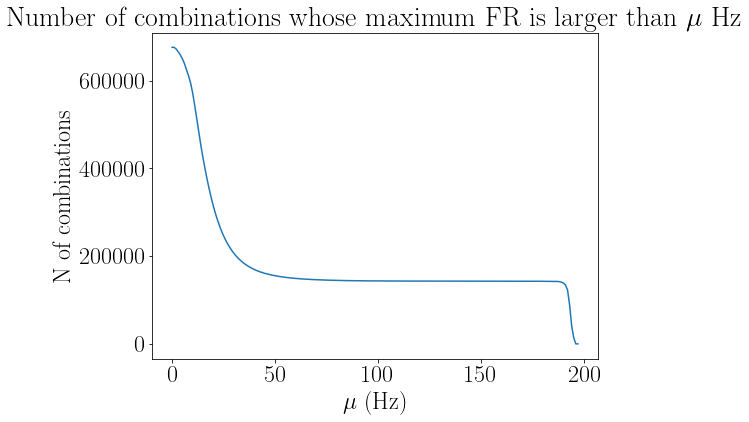

In [9]:
coeff_sweep = 'coeff_inh_1'

#figures_folder = '/home/master/Desktop/tests_hpc/figures/sweep_step6/' + coeff_sweep + '/'
# Select where we want to save the figures
batches_folder = './JUSUFlike/Project/FinalResultsNew/'

max_FRs_e = load_metric_sweeps('max_FR_e', batches_folder, steps=16)
max_FRs_i = load_metric_sweeps('max_FR_i', batches_folder, steps=16)

broken_point = np.amax(max_FRs_e)
max_frs = np.arange(np.ceil(broken_point) + 1)
n_combs_over = np.zeros_like(max_frs)
n_combs_over_e = np.zeros_like(max_frs)

for ii, max_fr in enumerate(max_frs):
    n_combs_over[ii] = np.sum(np.logical_and(max_FRs_e[:, -1] > max_fr, max_FRs_i[:, -1] > max_fr))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(max_frs, n_combs_over)
ax.set(xlabel='$\mu$ (Hz)', ylabel='N of combinations', 
       title='Number of combinations whose maximum FR is larger than $\mu$ Hz')
#fig.savefig(figures_folder + 'curve_bps.png')
plt.show()

In [10]:
# Let us count the parameters that have the highest values
n_params = 5
steps_per_par = 16
label_params = ['a', 'b_e (pA)', 'E_L_i (mV)', 'E_L_e (mV)', 'T (ms)']
range_pars = [(0, 0.5), (0, 120.0), (-80.0, -60.0), (-80.0, -60.0), (5.0, 40.0)]
all_bins = []
all_counts = []
all_centers = []
for id_param in range(n_params):
    bins = np.zeros(steps_per_par + 1)  # 6 steps per parameter
    vals = np.round(np.linspace(range_pars[id_param][0], range_pars[id_param][1], steps_per_par), 3)
    step = vals[1] - vals[0]
    bins = np.linspace(vals[0], vals[-1] + step, steps_per_par + 1) - step / 2
    centers = np.linspace(vals[0], vals[-1], steps_per_par)
    all_bins.append(bins)
    all_counts.append(np.zeros(steps_per_par))
    all_centers.append(centers)

for idx, (param_centers, param_counts) in enumerate(zip(all_centers, all_counts)):
    for ii, value in enumerate(param_centers):
        param_counts[ii] = np.sum(np.logical_and(max_FRs_e[:, -1] > broken_point-2, 
                                                 max_FRs_e[:, idx] == value))


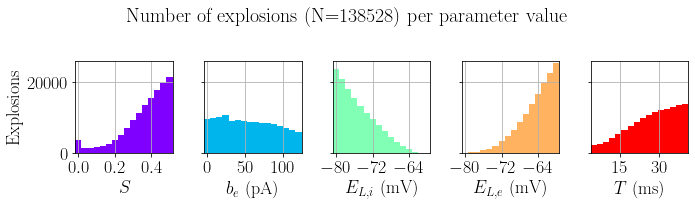

In [11]:
from matplotlib.ticker import MaxNLocator
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(1, n_params, figsize=(10, 3), sharey=True)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n_params)))

limit_val = 190
idxes = max_FRs_e[:, -1] > limit_val
number_of_bp = np.sum(idxes)
for ii, ax in enumerate(axes):
    c = next(color)
    ax.hist(max_FRs_e[idxes, ii], bins=all_bins[ii], align='mid', color=c)
    
    ax.set(ylim=(0, 26000), xlabel=fig_labels[ii],xlim=(all_bins[ii][0], all_bins[ii][-1]))
    # ticks
    ax.xaxis.set_major_locator(MaxNLocator(3)) 
    if ii == 0:
        ax.set(ylabel='Explosions')
    ax.grid()
fig.suptitle(f'Number of explosions (N={number_of_bp}) per parameter value')
plt.tight_layout()
#fig.savefig(figures_folder + 'distribution_bps_1d.pdf')
plt.show()

C:\Users\David\AppData\Local\Temp/ipykernel_5796/1470844498.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


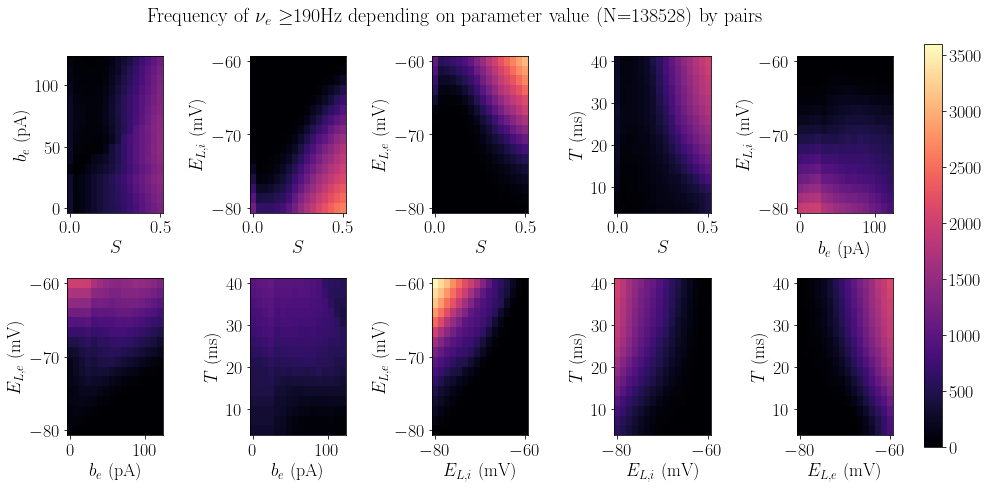

In [13]:
from itertools import combinations
fig, axes = plt.subplots(2, 5, figsize=(13, 7))
axes = axes.flatten()
limit_val = 190
idxes = max_FRs_e[:, -1] > limit_val
number_of_bp = np.sum(idxes)
for ii, (parx, pary) in enumerate(combinations(label_params, 2)):
    idx_parx = label_params.index(parx)
    idx_pary = label_params.index(pary)
    h = axes[ii].hist2d(max_FRs_e[idxes, idx_parx], max_FRs_e[idxes, idx_pary], 
                  bins=[all_bins[idx_parx], all_bins[idx_pary]], vmin=0, vmax=3600, cmap=plt.magma())
    # print(np.amax(np.array(h[0])))  # To determine max of 
    axes[ii].set(xlabel=fig_labels[idx_parx], ylabel=fig_labels[idx_pary])


cb_ax = fig.add_axes([1,.105,.02,.8])
fig.suptitle(f'Frequency of $\\nu_e$ $\geq${limit_val}Hz depending on parameter value (N={number_of_bp}) by pairs')
fig.colorbar(h[-1],orientation='vertical',cax=cb_ax)
plt.tight_layout()

#fig.savefig(figures_folder + 'distribution_bps_2D.png')
plt.show()

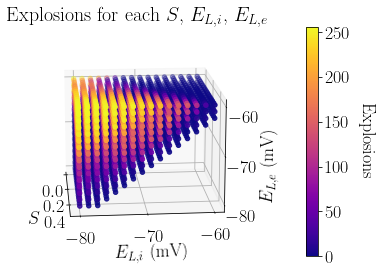

In [14]:
import itertools
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def plot_3d_p_explosion(results_folder, steps=16, fig=None, ax=None, imshow_range=None, type_plot='points'):
    """I want it to show the probability of explosion for the 3d plot."""
    params = ('a', 'E_L_i', 'E_L_e')
    list_values = []
    xvals = np.round(np.linspace(ranges_params[params[0]][0], ranges_params[params[0]][1], steps), 3)
    yvals = np.round(np.linspace(ranges_params[params[1]][0], ranges_params[params[1]][1], steps), 3)
    zvals = np.round(np.linspace(ranges_params[params[2]][0], ranges_params[params[2]][1], steps), 3) 
    
    idx_i = params.index('E_L_i')
    idx_e = params.index('E_L_e')

    name_metric = 'max_FR_e'
    d_data = load_metric_sweeps(name_metric, results_folder, steps=steps)
    
    clean_data = np.empty((2640, 4))
    ii = 0
    for comb in itertools.product(xvals, yvals, zvals):
        if (comb[idx_e] + 4) > comb[idx_i]:
            clean_data[ii, :-1] = comb
            # Now I have to find the idxes in dirty data, it's size should be around 256
            idxes = np.logical_and.reduce((d_data[:, dict_params[params[0]]] == comb[0], 
                                           d_data[:, dict_params[params[1]]] == comb[1],
                                           d_data[:, dict_params[params[2]]] == comb[2]))
            
            # Now we sum explosions
            clean_data[ii, -1] = np.sum(d_data[idxes, -1] > 175.0)
            
            # I could also do a fraction or ratio or probability of explosion by dividing it by 256.
            ii += 1
            
        else:
            continue

    x_arr = clean_data[:, 0]
    y_arr = clean_data[:, 1]
    z_arr = clean_data[:, 2]
    c_arr = clean_data[:, -1]

    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111, projection='3d')
    # Make a nice title
    title = 'Explosions for each $S$, $E_{L,i}$, $E_{L,e}$'
    if type(imshow_range) is type(None):
        imshow_range = (None, None)
    # plot the image and manage the axis
    
    img = ax.scatter(x_arr, y_arr, z_arr, c=c_arr, cmap=plt.plasma(), vmin=imshow_range[0], vmax=imshow_range[1])
    
    # Improve title and it should be ok!
    ax.set(title=title)
    ax.set_xlabel(fig_labels[dict_params[params[0]]], labelpad=8)
    ax.set_ylabel(fig_labels[dict_params[params[1]]], labelpad=8)
    ax.set_zlabel(fig_labels[dict_params[params[2]]], labelpad=8)
    plt.tight_layout()
    cbar = fig.colorbar(img, pad=0.1)
    cbar.ax.set_ylabel('Explosions', rotation=270, labelpad=26)
    for ii in range(0, 360, 5):
        ax.view_init(elev=15.0, azim=ii)
        fig.savefig("./figures/explosions/movie%d.png" % ii)
        if ii == 305:
            fig.savefig(figures_folder + '/explosions_3d.pdf')
    
    images = []
    movie_folder = './figures/explosions/'
    title_movie = 'explosions'
    for step in range(0, 360, 5):
        filename = movie_folder + f'movie{step}.png'
        images.append(imageio.imread(filename))
    imageio.mimsave(movie_folder + title_movie + '.gif', images, duration=0.15)
    
    return fig, ax

batches_folder = './JUSUFlike/Project/FinalResults/'
fig, ax = plot_3d_p_explosion(batches_folder, steps=16, fig=None, ax=None, imshow_range=None, type_plot='points')


# Another attempt at prediction inspired by the previous one

In [2]:
from numba import njit
@njit(fastmath=True)
def traces_process(metric_arr, max_FRs, comb_array, skip_null_a=True):
    """Function to process the data in a way that the metric of a network can be plotted as traces changing with b"""

    # I want to put in a single matrix the 16 values of corrFCSC ordered by increasing b_e and then the 4 params

    nrows = int(675840 / 16)  # Since the b combinations won't be considered, will be "flattened in that dimension"

    data = np.empty((nrows, 20))  # 16 first columns for corrFCSC values and other 4 for parameters

    # I will sweep over each row in the 675840 combinations. It might be interesting to transform it in a numba fun.

    # Quite slow!
    cont_row = 0
    for ii in range(comb_array.shape[0]):
        param_vals = comb_array[ii]
        if skip_null_a and param_vals[0] == 0:
            continue
        else:    
            a_idxs = metric_arr[:, 0] == param_vals[0]
            ELI_idxs = metric_arr[:, 2] == param_vals[1]
            ELE_idxs = metric_arr[:, 3] == param_vals[2]
            T_idxs = metric_arr[:, 4] == param_vals[3]
            # Ugly but needed for numba
            idxes = np.logical_and(a_idxs, ELI_idxs)
            idxes = np.logical_and(idxes, ELE_idxs)
            idxes = np.logical_and(idxes, T_idxs)

            # Check if explosions in the 16 values
            max_temp = max_FRs[idxes, -1]
            if max_temp.size == 16:  # If not 16 means that the combination does not exist
                if np.amax(max_temp) > 175: # If there is an explosion, ignore
                    continue
                else:
                    metric_temp = metric_arr[:, np.array([1, 5])][idxes]  # We take b and corr columns and then select those we want
                    metrics = metric_temp[metric_temp[:, 0].argsort()][:, 1]  # Sort wrt to b and take col of corr to add to data
                    data[cont_row, :16] = metrics
                    data[cont_row, 16:] = param_vals

                    cont_row += 1
    data = data[:cont_row, :]  # Get rid of the empty rows
    
    return data

In [3]:
batches_folder = './JUSUFlike/Project/FinalResultsNew/'
scfc = load_metric_sweeps('corr_FC_SC_e', batches_folder, steps=16)
fc = load_metric_sweeps('mean_FC_e', batches_folder, steps=16)
max_FRs = load_metric_sweeps('max_FR_e', batches_folder, steps=16)

avals = np.round(np.linspace(ranges_params['a'][0], ranges_params['a'][1], 16), 3)
bvals = np.round(np.linspace(ranges_params['b_e'][0], ranges_params['b_e'][1], 16), 3)
ELIvals = np.round(np.linspace(ranges_params['E_L_i'][0], ranges_params['E_L_i'][1], 16), 3)
ELEvals = np.round(np.linspace(ranges_params['E_L_e'][0], ranges_params['E_L_e'][1], 16), 3)
Tvals = np.round(np.linspace(ranges_params['T'][0], ranges_params['T'][1], 16), 3)

comb_array = np.empty((16**4, 4))
for ii, comb in enumerate(itertools.product(avals, ELIvals, ELEvals, Tvals)):
    comb_array[ii, :] = comb

**Only run again if the data is not available, it takes a long time**

In [4]:
process = False
if process:
    data = traces_process(scfc, max_FRs, comb_array, skip_null_a=True)  # Takes long even with numba...
    np.save('./data/corrFCSCprocessedNew.npy', data)

In [5]:
if process:
    data = traces_process(fc, max_FRs, comb_array, skip_null_a=True)  # Takes long even with numba...
    np.save('./data/FCprocessedNew.npy', data)

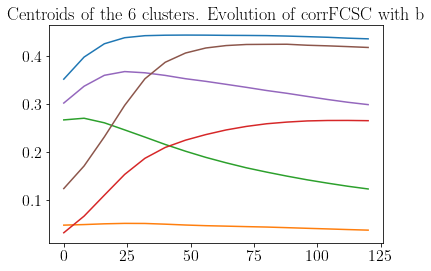

23


[]

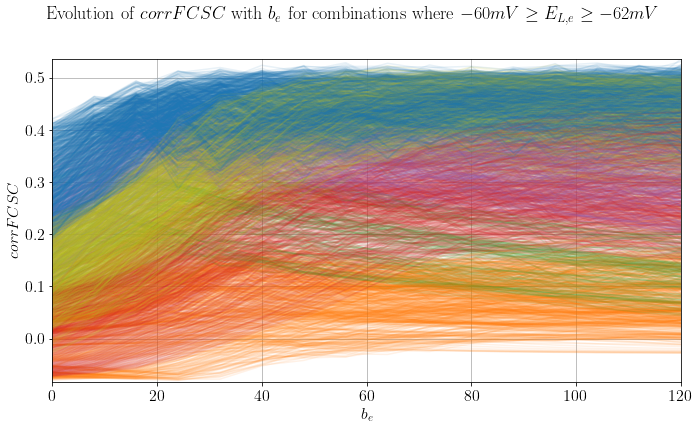

In [6]:
# Plot for all Ts of subregion of ELE ELI
n_clusters = 6
metric = 'corrFCSC'
ELEmaxmin = (-60, -62)

if metric == 'FC':
    data = np.load('./data/FCprocessedNew.npy')
elif metric == 'corrFCSC':
    data = np.load('./data/corrFCSCprocessedNew.npy')
else:
    raise ValueError('Select a correct value of metric (FC or corrFCSC)')

kmeans = KMeans(n_clusters=n_clusters, random_state=4).fit(data[:, :16])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.linspace(0, 120, 16), kmeans.cluster_centers_.T)
ax.set(title=f'Centroids of the {n_clusters} clusters. Evolution of {metric} with b')
plt.show()
print(kmeans.n_iter_)


palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:grey',
           'tab:pink', 'tab:brown', 'tab:cyan']

palette = palette[:n_clusters]
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ii = 0
ylim = (np.amin(data[:, :16]), np.amax(data[:, :16]))

T = 19

# So what we want is a fixed value of T, and E_L_e > 70 (which will automatically constrict E_L_i)
T_idxs = data[:, -1] == T
ELE_idxs = np.logical_and(data[:, -2] <= ELEmaxmin[0], data[:, -2] >= ELEmaxmin[1])
data_plot = data[ELE_idxs, :17]  # Let's keep also a to color code
labels = kmeans.labels_[ELE_idxs]
colors = [palette[idx] for idx in labels]
# I want now to plot the lines taking a as colormap, it would be cool
mean = np.mean(data_plot[:, :16], axis=0)
for kk, row in enumerate(data_plot):
    axes.plot(np.linspace(0, 120, 16), row[:16], c=colors[kk], alpha=0.1)
    #axes.plot(np.linspace(0, 120, 16), row[:16], c='k', alpha=0.1)
#axes[ii].plot(np.linspace(0, 120, 16), data_plot[:, :16].T, c=colors, alpha=0.1)  # Color coded by b
#axes[ii].plot(np.linspace(0, 120, 16), mean, c='k', alpha=1)

axes.set(ylim=ylim, xlim=(0, 120), ylabel=f'${metric}$', xlabel='$b_e$')
axes.grid()
#fig.colorbar(im, ax=axes[ii])
    
suptitle = 'Evolution of $' + metric + '$ with $b_e$ for combinations where $' + str(ELEmaxmin[0]) + \
'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
fig.suptitle(suptitle, y=1)
plt.tight_layout()
plt.plot()

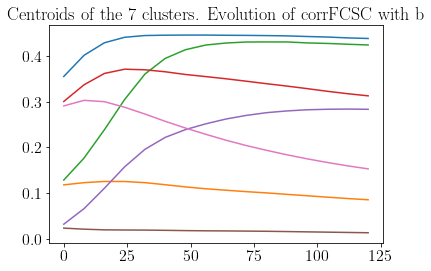

39


[]

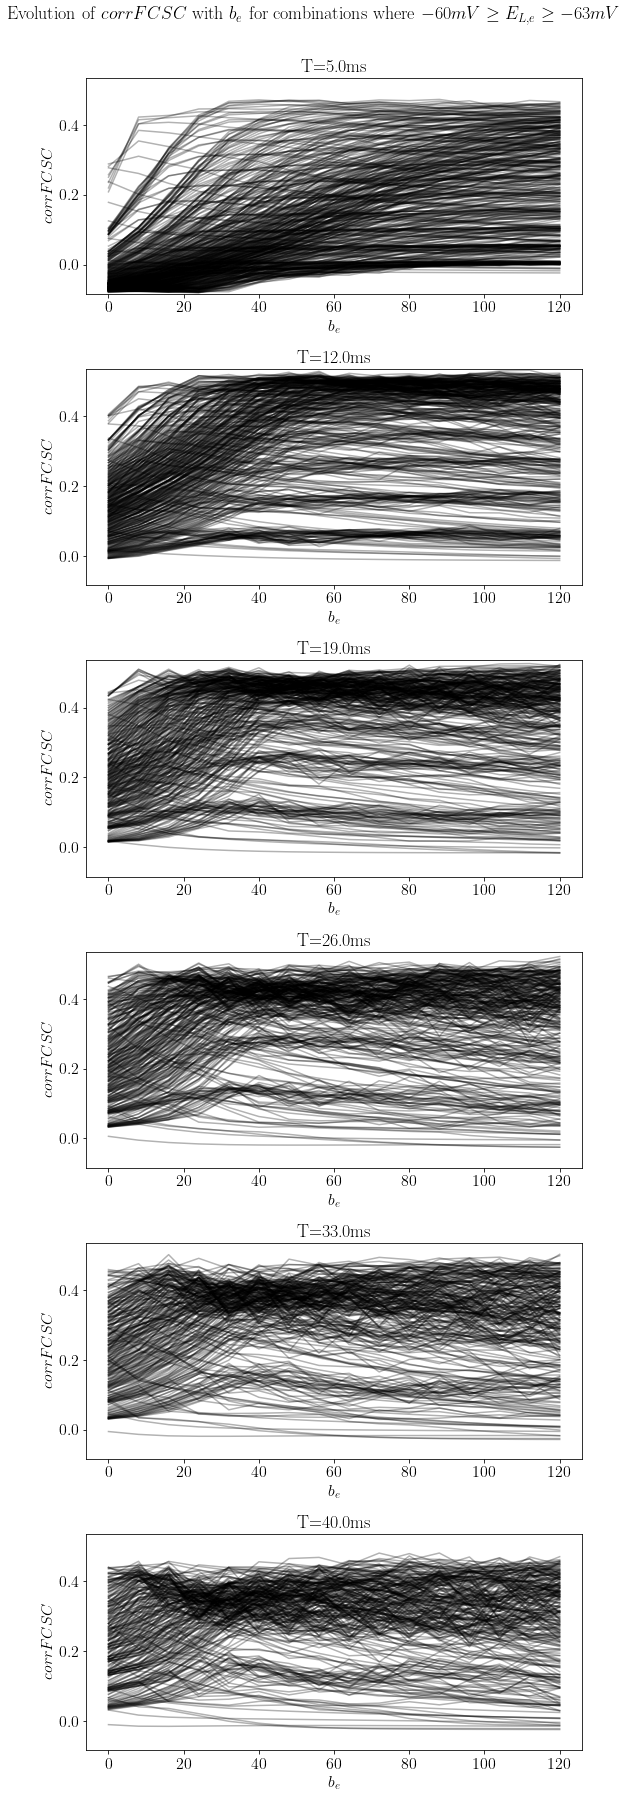

In [7]:
# Just one, I will now do both of them and also histograms of couples.
n_clusters = 7
metric = 'corrFCSC'
ELEmaxmin = (-60, -63)

if metric == 'FC':
    data = np.load('./data/FCprocessedNew.npy')
elif metric == 'corrFCSC':
    data = np.load('./data/corrFCSCprocessedNew.npy')
else:
    raise ValueError('Select a correct value of metric (FC or corrFCSC)')

kmeans = KMeans(n_clusters=n_clusters).fit(data[:, :16])
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.linspace(0, 120, 16), kmeans.cluster_centers_.T)
ax.set(title=f'Centroids of the {n_clusters} clusters. Evolution of {metric} with b')
plt.show()
print(kmeans.n_iter_)


palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
           'tab:grey', 'tab:olive', 'tab:cyan']

palette = palette[:n_clusters]
fig, axes = plt.subplots(6, 1, figsize=(8, 25))
ii = 0
ylim = (np.amin(data[:, :16]), np.amax(data[:, :16]))
for T in np.linspace(5, 40, 16)[::3]:
    # So what we want is a fixed value of T, and E_L_e > 70 (which will automatically constrict E_L_i)
    T_idxs = data[:, -1] == T
    ELE_idxs = np.logical_and(data[:, -2] <= ELEmaxmin[0], data[:, -2] >= ELEmaxmin[1])
    data_plot = data[np.logical_and(T_idxs, ELE_idxs), :17]  # Let's keep also a to color code
    labels = kmeans.labels_[np.logical_and(T_idxs, ELE_idxs)]
    colors = [palette[idx] for idx in labels]
    # I want now to plot the lines taking a as colormap, it would be cool
    mean = np.mean(data_plot[:, :16], axis=0)
    for kk, row in enumerate(data_plot):
        #axes[ii].plot(np.linspace(0, 120, 16), row[:16], c=colors[kk], alpha=0.3)
        axes[ii].plot(np.linspace(0, 120, 16), row[:16], c='k', alpha=0.3)
    #axes[ii].plot(np.linspace(0, 120, 16), data_plot[:, :16].T, c=colors, alpha=0.1)  # Color coded by b
    #axes[ii].plot(np.linspace(0, 120, 16), mean, c='k', alpha=1)

    axes[ii].set(ylim=ylim, ylabel=f'${metric}$', xlabel='$b_e$', 
                 title=f'T={round(T, 2)}ms')
    #fig.colorbar(im, ax=axes[ii])
    ii += 1
    
suptitle = 'Evolution of $' + metric + '$ with $b_e$ for combinations where $' + str(ELEmaxmin[0]) + \
'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
fig.suptitle(suptitle, y=1)
plt.tight_layout()
plt.plot()

In [8]:
from matplotlib.ticker import MaxNLocator
n_clusters = 6
ELEmaxmin = (-60, -65)
state = 'Healthy'


data_FC = np.load('./data/FCprocessedNew.npy')
data_FCSC = np.load('./data/corrFCSCprocessedNew.npy')


kmeans_FC = KMeans(n_clusters=n_clusters, random_state=4).fit(data_FC[:, :16])
kmeans_FCSC = KMeans(n_clusters=n_clusters, random_state=4).fit(data_FCSC[:, :16])

In [9]:
print(data_FC.shape)
# 16 first are the b values, therefore the other 4 are the parameters, order?
# -1 es T, -2 es ELE, -3 es ELI, -4 es S
# So let us print the labels of our interests
labels = kmeans_FCSC.labels_
labels_FC = kmeans_FC.labels_
for T in [5, 19, 40]:
    # Este de locos
    par_comb = {'E_L_i':-64, 'E_L_e': -60, 'a':0.2, 'T': T}
    T_idxs = data_FCSC[:, -1] == T
    ELE_idxs = data_FCSC[:, -2] == par_comb['E_L_e']
    ELI_idxs = data_FCSC[:, -3] == par_comb['E_L_i']
    a_idxs = data_FCSC[:, -4] == par_comb['a']
    idx = np.logical_and.reduce((T_idxs, ELE_idxs, ELI_idxs, a_idxs))
    print(labels[idx])

for T in [5, 19, 40]:
    par_comb1 = {'E_L_i':-78.667, 'E_L_e': -78.667, 'a':0.333, 'T': T}
    T_idxs = data_FCSC[:, -1] == T
    ELE_idxs = data_FCSC[:, -2] == par_comb1['E_L_e']
    ELI_idxs = data_FCSC[:, -3] == par_comb1['E_L_i']
    a_idxs = data_FCSC[:, -4] == par_comb1['a']
    idx = np.logical_and.reduce((T_idxs, ELE_idxs, ELI_idxs, a_idxs))
    print(labels[idx])
good_FC = (labels_FC == 2) & (labels == 3)
print(data_FC[good_FC, -4:])


(25214, 20)
[3]
[5]
[4]
[2]
[0]
[]
[]


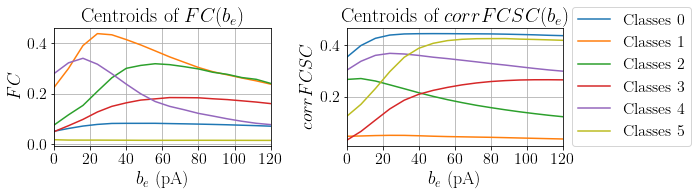

In [12]:
#fig, axes = plt.subplots(7, 3, figsize=(20, 25))
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:grey',
           'tab:pink', 'tab:brown', 'tab:cyan']
palette = palette[:n_clusters]

for ax in axes:
    ax.grid()
    ax.set_xlim((0, 120))
for ii, centroid in enumerate(kmeans_FC.cluster_centers_):
    axes[0].plot(np.linspace(0, 120, 16), centroid, c=palette[ii])
    axes[0].xaxis.set_major_locator(MaxNLocator(6)) 
    axes[0].set(ylabel='$FC$', xlabel='$b_e$ (pA)', title=f'Centroids of $FC(b_e)$')
for ii, centroid in enumerate(kmeans_FCSC.cluster_centers_):
    axes[1].plot(np.linspace(0, 120, 16), centroid, c=palette[ii], label=f'Classes {ii}')
    axes[1].set(ylabel='$corrFCSC$', xlabel='$b_e$ (pA)', title=f'Centroids of $corrFCSC(b_e)$')
    axes[1].xaxis.set_major_locator(MaxNLocator(6)) 

axes[1].legend(loc=(1.04,0))
plt.tight_layout()
fig.savefig(figures_folder + '/centroids.pdf')
plt.show()

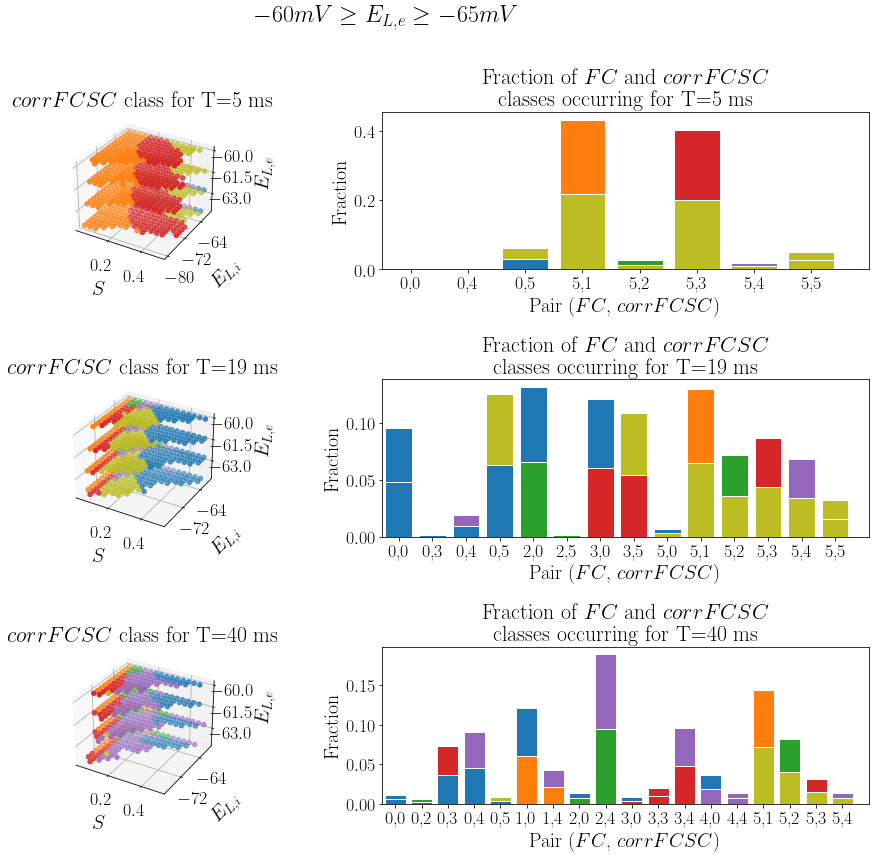

In [13]:
from matplotlib.ticker import MaxNLocator
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(14, 12))
axes = []
axes_i = 1
for i in range(3):
        list_axes = []
        list_axes.append(fig.add_subplot(3, 2, axes_i, projection='3d'))
        axes_i += 1
        list_axes.append(fig.add_subplot(3, 2, axes_i))
        axes_i += 1
        axes.append(list_axes)

ii = 0
for T in [5, 19, 40]:
    T_idxs = data_FC[:, -1] == T
    ELE_idxs = np.logical_and(data_FC[:, -2] <= ELEmaxmin[0], data_FC[:, -2] >= ELEmaxmin[1])
    
    data_FC_plot = data_FC[np.logical_and(T_idxs, ELE_idxs), :17] 
    labels_FC = kmeans_FC.labels_[np.logical_and(T_idxs, ELE_idxs)]
    
    data_FCSC_plot = data_FCSC[np.logical_and(T_idxs, ELE_idxs), :17]  # Let's keep also a to color code
    labels_FCSC = kmeans_FCSC.labels_[np.logical_and(T_idxs, ELE_idxs)]
    
    colors = [palette[idx] for idx in labels_FCSC]
    
    axes[ii][1] = histogram_pairs_states(labels_FC, labels_FCSC, n_clusters, axes[ii][1], palette)
    axes[ii][1].set(xlabel='Pair ($FC$, $corrFCSC$)', ylabel='Fraction', 
                    title=f'Fraction of $FC$ and $corrFCSC$ \n classes occurring for T=${T}$ ms')
    # Now the 3D plots of the assigned values, cool that I can fit all of them in the plot!
    data_FCSC_scatter = data_FCSC[np.logical_and(T_idxs, ELE_idxs), 16:19]  # Keep only the params
    # We already have the labels, so it should be quite easy!
    axes[ii][0].scatter(data_FCSC_scatter[:, 0], 
                        data_FCSC_scatter[:, 1],
                        data_FCSC_scatter[:, 2], c=colors)
    axes[ii][0].xaxis.set_major_locator(MaxNLocator(3)) 
    axes[ii][0].yaxis.set_major_locator(MaxNLocator(3)) 
    axes[ii][0].zaxis.set_major_locator(MaxNLocator(3)) 
    axes[ii][0].set_xlabel('$S$', labelpad=10)
    axes[ii][0].set_ylabel('$E_{L,i}$', labelpad=14)
    axes[ii][0].set_zlabel('$E_{L,e}$', labelpad=12)
    axes[ii][0].set(title=f'$corrFCSC$ class for T=${T}$ ms')
    
    ii += 1
title = '$' + str(ELEmaxmin[0]) + 'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
fig.suptitle(title, y=1, fontsize=24)
plt.tight_layout()
fig.savefig(figures_folder + f'/ELEmax{ELEmaxmin[0]}ELEmin{ELEmaxmin[1]}_3d_hist.pdf', bbox_inches='tight')
plt.show()

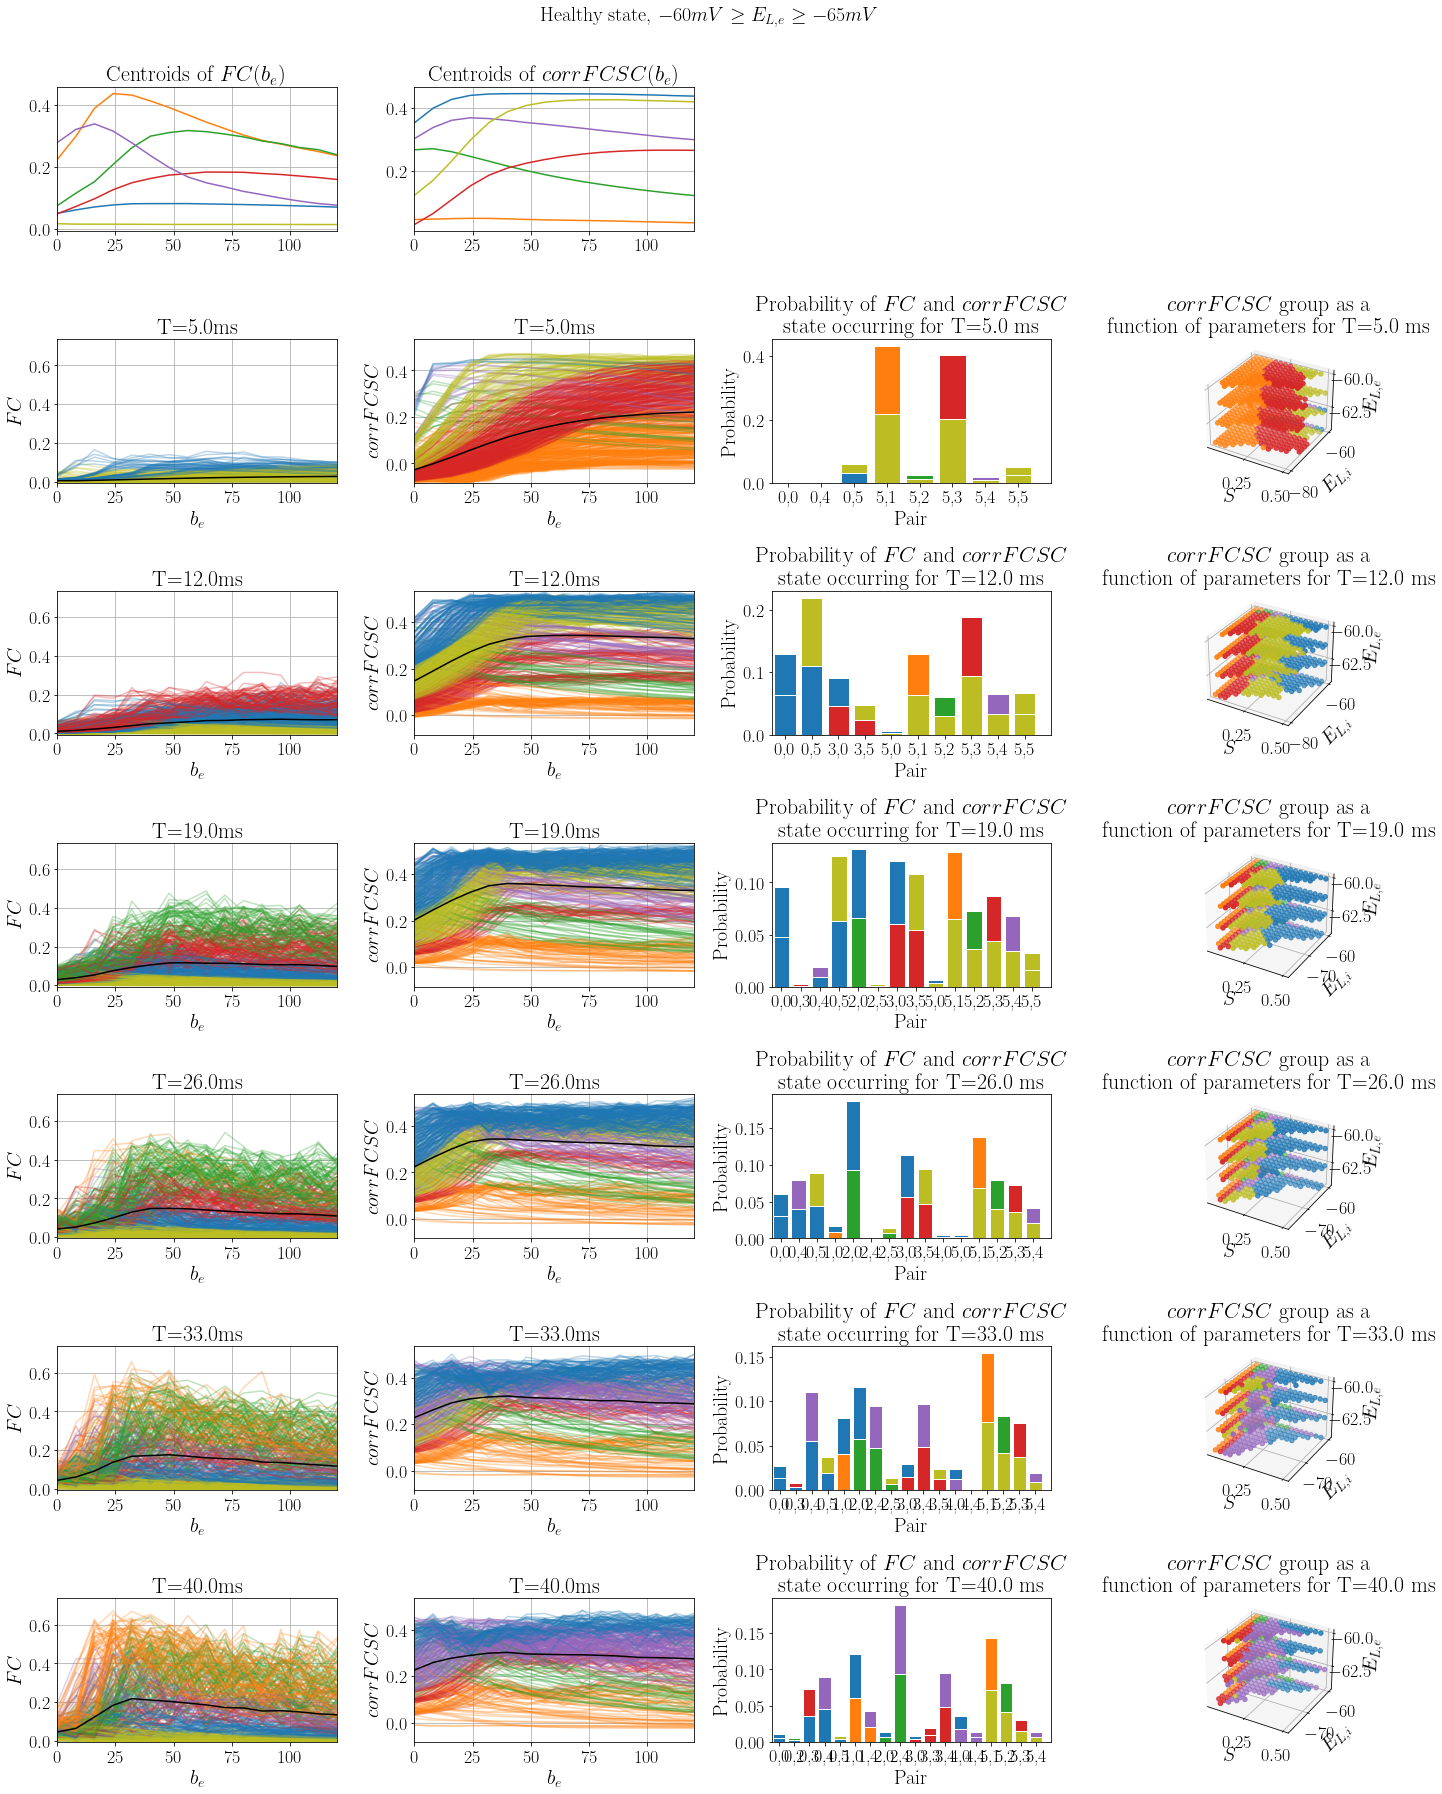

In [17]:
#fig, axes = plt.subplots(7, 3, figsize=(20, 25))
fig = plt.figure(figsize=(20, 25))
axes = np.empty((7, 3))
ax_3d = []
axes = []
axes_i = 1
for i in range(7):
    if i == 0:
        list_axes = []
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        axes.append(list_axes)
    else:
        list_axes = []
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        list_axes.append(fig.add_subplot(7, 4, axes_i))
        axes_i += 1
        axes.append(list_axes)
        idx_subplot = 4 * (1 + i)
        ax_3d.append(fig.add_subplot(7, 4, idx_subplot, projection='3d'))
        axes_i += 1



palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:olive', 'tab:grey',
           'tab:pink', 'tab:brown', 'tab:cyan']
palette = palette[:n_clusters]

for ax_list in axes:
    for ax in ax_list[:2]:
        ax.grid()
        ax.set_xlim((0, 120))
for ii, centroid in enumerate(kmeans_FC.cluster_centers_):
    axes[0][0].plot(np.linspace(0, 120, 16), centroid, c=palette[ii])
    axes[0][0].set(title=f'Centroids of $FC(b_e)$')
for ii, centroid in enumerate(kmeans_FCSC.cluster_centers_):
    axes[0][1].plot(np.linspace(0, 120, 16), centroid, c=palette[ii], label=f'States {ii}')
    axes[0][1].set(title=f'Centroids of $corrFCSC(b_e)$')

#axes[0][1].legend(loc=(1.04,0))


ii = 1
for T in np.linspace(5, 40, 16)[::3]:
    # Start by FC plot
    T_idxs = data_FC[:, -1] == T
    ELE_idxs = np.logical_and(data_FC[:, -2] <= ELEmaxmin[0], data_FC[:, -2] >= ELEmaxmin[1])
    data_FC_plot = data_FC[np.logical_and(T_idxs, ELE_idxs), :17]  # Let's keep also a to color code
    
    labels_FC = kmeans_FC.labels_[np.logical_and(T_idxs, ELE_idxs)]
    colors = [palette[idx] for idx in labels_FC]
    # I want now to plot the lines taking a as colormap, it would be cool
    mean = np.mean(data_FC_plot[:, :16], axis=0)
    ylim = (np.amin(data_FC[:, :16]), np.amax(data_FC[:, :16]))
    for kk, row in enumerate(data_FC_plot):
        axes[ii][0].plot(np.linspace(0, 120, 16), row[:16], c=colors[kk], alpha=0.3)
    # Plot FC
    axes[ii][0].plot(np.linspace(0, 120, 16), mean, c='k', alpha=1)
    axes[ii][0].set(ylim=ylim, ylabel=f'$FC$', xlabel='$b_e$', 
                 title=f'T={round(T, 2)}ms')
    
    T_idxs = data_FCSC[:, -1] == T
    ELE_idxs = np.logical_and(data_FCSC[:, -2] <= ELEmaxmin[0], data_FCSC[:, -2] >= ELEmaxmin[1])
    data_FCSC_plot = data_FCSC[np.logical_and(T_idxs, ELE_idxs), :17]  # Let's keep also a to color code
    labels_FCSC = kmeans_FCSC.labels_[np.logical_and(T_idxs, ELE_idxs)]
    colors = [palette[idx] for idx in labels_FCSC]
    # I want now to plot the lines taking a as colormap, it would be cool
    mean = np.mean(data_FCSC_plot[:, :16], axis=0)
    ylim = (np.amin(data_FCSC[:, :16]), np.amax(data_FCSC[:, :16]))
    for kk, row in enumerate(data_FCSC_plot):
        axes[ii][1].plot(np.linspace(0, 120, 16), row[:16], c=colors[kk], alpha=0.3)
    # Plot FC
    axes[ii][1].plot(np.linspace(0, 120, 16), mean, c='k', alpha=1)
    axes[ii][1].set(ylim=ylim, ylabel=f'$corrFCSC$', xlabel='$b_e$', 
                 title=f'T={round(T, 2)}ms')
    # Now the histogram of pairs
    axes[ii][2] = histogram_pairs_states(labels_FC, labels_FCSC, n_clusters, axes[ii][2], palette)
    axes[ii][2].set(xlabel='Pair', ylabel='Probability', 
                    title=f'Probability of $FC$ and $corrFCSC$ \n state occurring for T=${T}$ ms')
    # Now the 3D plots of the assigned values, cool that I can fit all of them in the plot!
    data_FCSC_scatter = data_FCSC[np.logical_and(T_idxs, ELE_idxs), 16:19]  # Keep only the params
    # We already have the labels, so it should be quite easy!
    ax_3d[ii-1].scatter(data_FCSC_scatter[:, 0], 
                        data_FCSC_scatter[:, 1],
                        data_FCSC_scatter[:, 2], c=colors)
    ax_3d[ii-1].set(xlabel='$S$', ylabel='$E_{L,i}$', zlabel='$E_{L,e}$', 
                    title=f'$corrFCSC$ group as a \n function of parameters for T=${T}$ ms')
    
    ii += 1
    
#suptitle = 'Evolution of $' + metric + '$ with $b_e$ for combinations where $' + str(ELEmaxmin[0]) + \
#'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
title = '$' + str(ELEmaxmin[0]) + 'mV \geq E_{L,e} \geq' + str(ELEmaxmin[1]) + 'mV$'
fig.suptitle(f'{state} state, ' + title, y=1, fontsize=20)
fig.delaxes(axes[0][2])
fig.delaxes(axes[0][3])
plt.tight_layout()
fig.savefig(figures_folder + '/FC_SCFC_' + str(ELEmaxmin[0]) + str(ELEmaxmin[1]) + '.eps')
plt.show()